# **Import Modules**

## *python*

In [1]:
import os
import sys

import arviz as az

## *custom*

In [2]:
# Import customised modules
# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._03_bayesian_inference_vis import ChangePointAnalysis

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Bayesian Model Interpretation**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook

log_price_path = os.path.join(
    ntbk_dir, "..", "data", "processed", "BrentOilPrices_Log.csv"
)
events_path = os.path.join(ntbk_dir, "..", "data", "raw", "Events.csv")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")
plot_dir = os.path.join(ntbk_dir, "..", "insights", "model")

# Load previously saved trace
trace_path = os.path.join(ntbk_dir, "..", "data", "processed", "model_trace.nc")
trace = az.from_netcdf(trace_path)

In [4]:
# Create model instance
model = ChangePointAnalysis(
    log_price_path=log_price_path,
    trace=trace,
    events_path=events_path,
    processed_dir=processed_dir,
    plot_dir=plot_dir,
)

ChangePointAnalysis Class initalised ...



💾 Trace plot saved to ..\insights\model\trace_plot.png


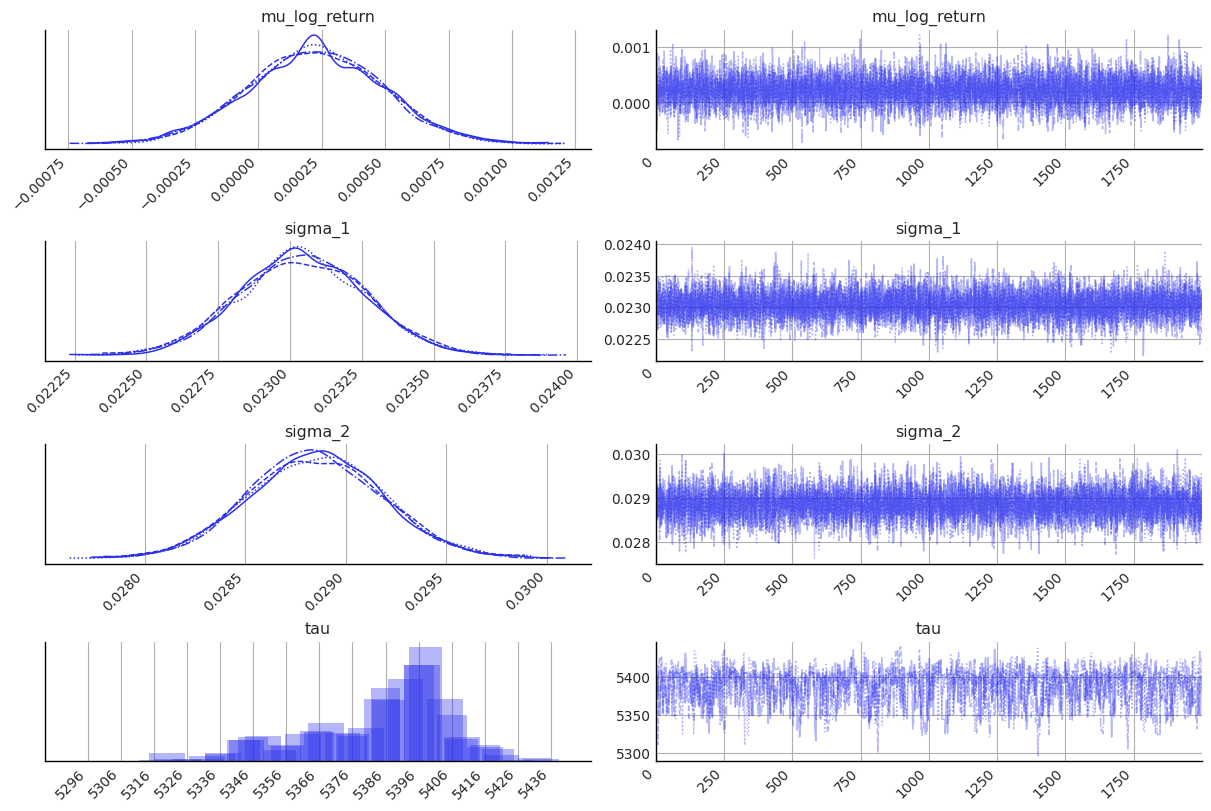

💾 Posterior plot saved to ..\insights\model\posterior_plot.png


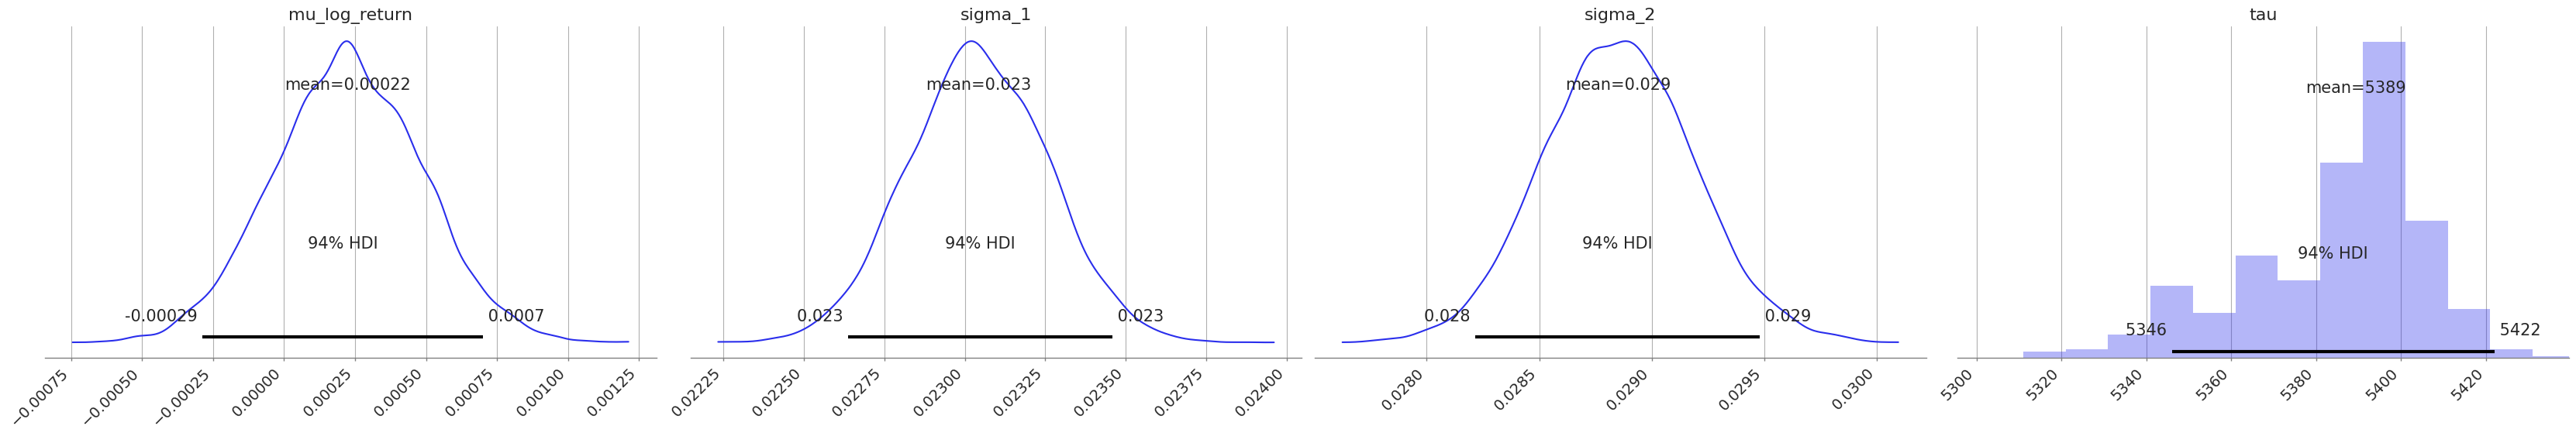

💾 Energy plot saved to ..\insights\model\energy_plot.png


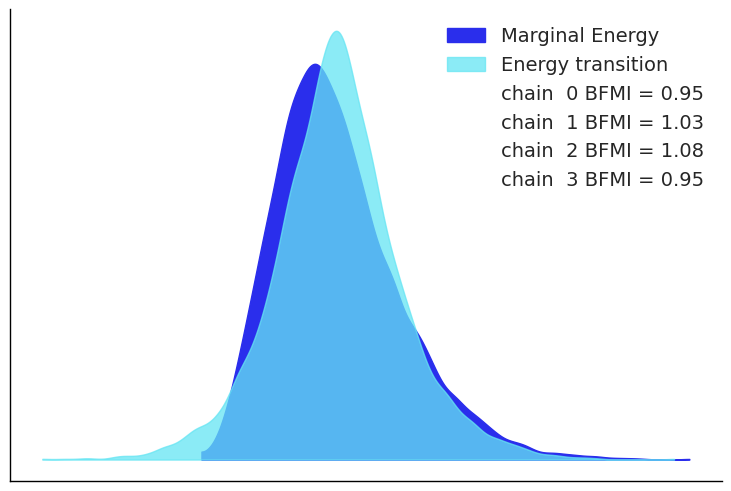

Event data loaded.

📈 Estimated Change Point: 2008-07-28

📅 Events near 2008-07-28 (60 day window):


,Date,Event Name,Event Type,Description
0,2008-07-01,Global Financial Crisis Onset,Economic Shock,Speculation and demand fears drove prices to r...


In [5]:
# Run full Bayesian change point analysis
model.run_analysis()